# <center> Assignment


## Objectives:
To predict the risk of heart disease based on a dataset of patient
information using the Random Forest classifier.


In [377]:
# import all essential library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


%matplotlib inline

In [378]:
# laod the dataset
data = pd.read_csv("dataset.csv")

df= pd.DataFrame(data)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Answer 1
### Preprocessing of the data

In [379]:
df.shape

(303, 14)

 - Data set have 303 Instances and 14 features

In [380]:
## checking the missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Insights:
-  There is no Missing value in the dataset

In [381]:
## info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [382]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [383]:
df['target'].unique()

array([1, 0], dtype=int64)

In [384]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Outliers 

<Axes: >

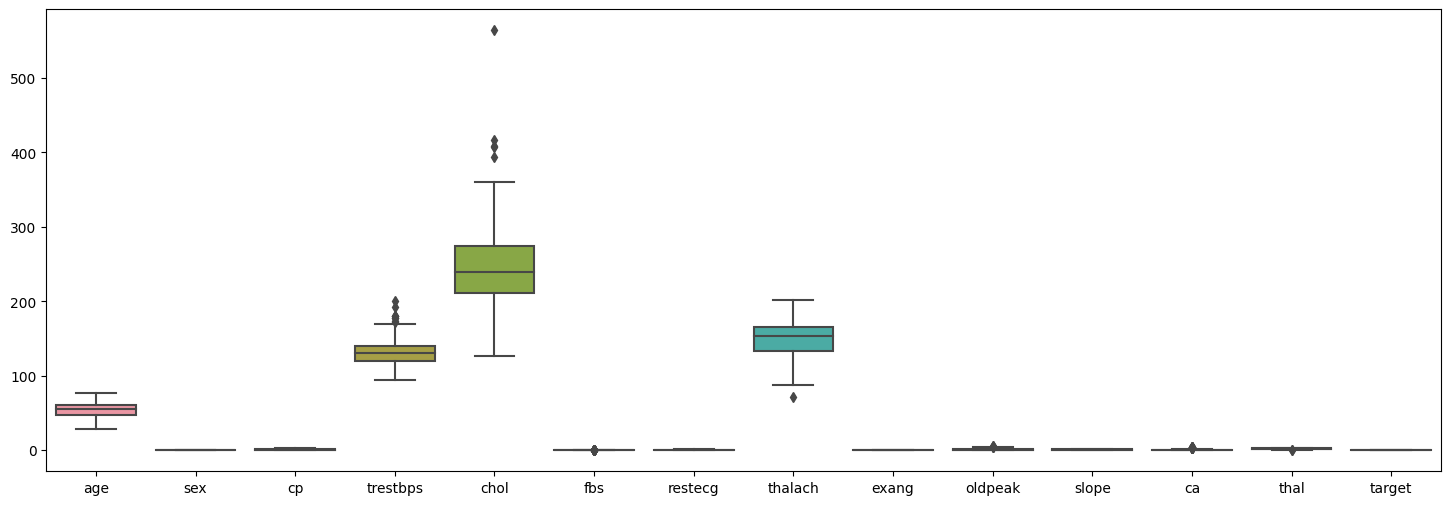

In [385]:
fig,ax = plt.subplots(figsize=(18,6))
sns.boxplot(df)

In [386]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Removeving the outliers

In [387]:
# # Calculate the first and third quartiles (Q1 and Q3)
for col in df.columns[:-1]:
    if col == 'fbs':
        continue
    else: 
        print(col) 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1

        # Determine the upper and lower bounds for outliers
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5* IQR

        # Remove outliers
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]




age
sex
cp
trestbps
chol
restecg
thalach
exang
oldpeak
slope
ca
thal


## Visualization after Removing the outliers

<Axes: >

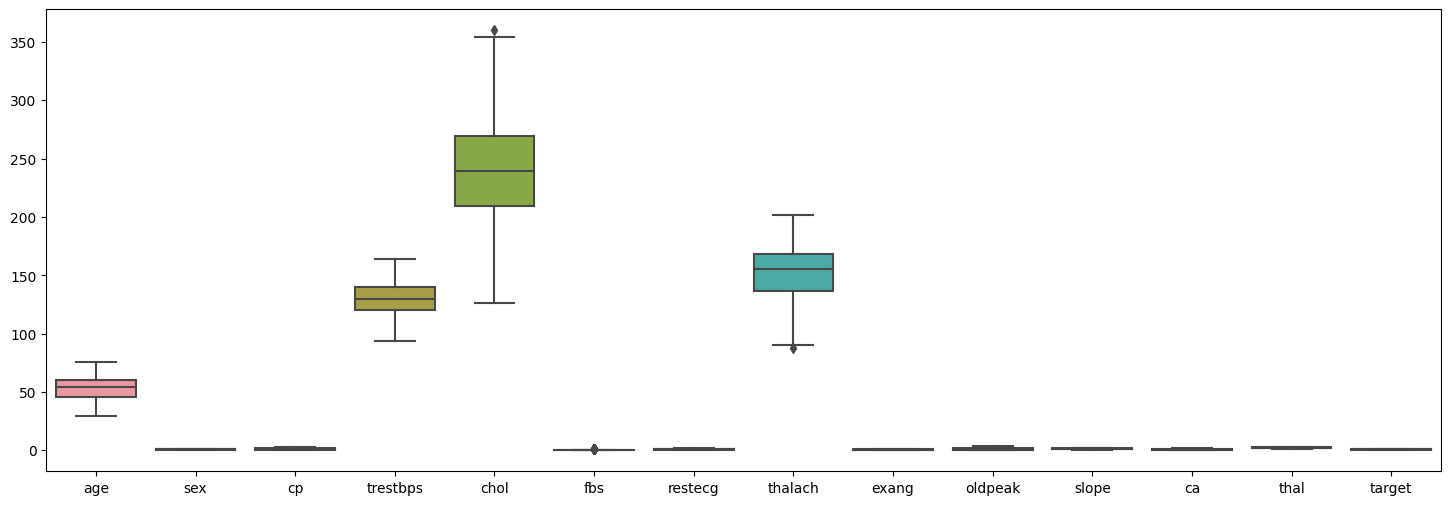

In [388]:
fig,ax = plt.subplots(figsize=(18,6))
sns.boxplot(df)

#### Indepandent and Dependent feature


In [389]:
X = df.drop('target',axis =1)
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [390]:
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 256, dtype: int64

In [391]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object

scaler = StandardScaler()

# Fit the scaler to the input data
X_train_scaled = scaler.fit_transform(X)



------

## Answer 2

### Split the dataset into a training set (70%) and a test set (30%).

In [392]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [393]:
# check
X_train.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3


In [394]:
# check 
X_test.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3


----

## Answer 3 

 Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

##### As acoording to the Question
- 100 tree means n_estimator = 100
- max_depth =10

### Training the model with given conditions

In [395]:


from sklearn.ensemble import RandomForestClassifier

## create an object for the random forest classifier
#100 tree means n_estimator = 100 and and max_depth =10

rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the random forest classifier on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

# Answer 4

### Evaluating the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [396]:
# import essential library 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

# Predict the labels for the test data using the trained classifier
y_pred = rfc.predict(X_test)


# Calculate the evaluation metrics for the predictions

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)



# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.8051948051948052
Precision:  0.8260869565217391
Recall:  0.8444444444444444
F1 score:  0.8351648351648352


## Insights:
Accuracy of the model is :
81.31%

Precision : 82.35%

Recall : 84%

F1-Score : 83%

Note: A higher F1 score indicates better overall performance.

------

### Confusion metrix

In [397]:
# confusion_ma
# sns.heatmap()

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

## Answer 5
-  Best 5 features



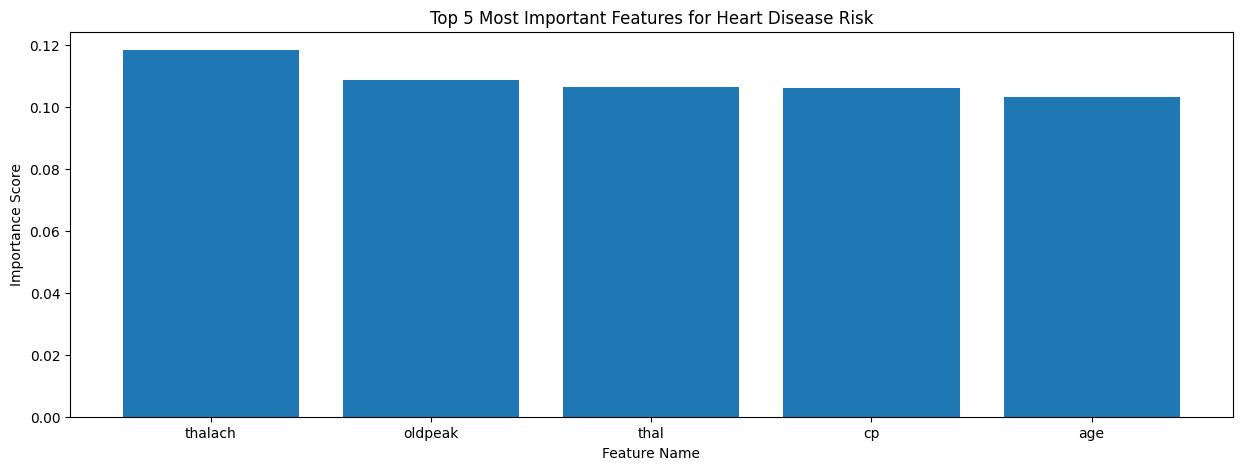

In [398]:
# feature names
feature_names = rfc.feature_names_in_
feature_importance = rfc.feature_importances_

## create the dictionary of the feature names and their importances
feature_dict= dict(zip(feature_names, feature_importance))

# Sort the dictionary in descending order of importance
sorted_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

# get top 5 features
top_5_features = sorted_features[:5]
top_feature_names = [f[0] for f in top_5_features]
top_feature_importances = [f[1] for f in top_5_features]

# Plot the feature importances as a bar chart
fig ,ax = plt.subplots(figsize=(15,5))
plt.bar(top_feature_names, top_feature_importances)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title("Top 5 Most Important Features for Heart Disease Risk")
plt.show()

-------

###  Answer 6

Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [399]:
from sklearn.model_selection import GridSearchCV, KFold

# Define the parameter grid to search

param_grid = {'n_estimators':[50,150,250],
              'max_depth': [5,10,25],
                 'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
}

# Create a cross-validation object
cv = KFold(n_splits=5,shuffle=True,random_state=42)


# create a GridSearch objwct
grid_search = GridSearchCV(rfc,param_grid=param_grid ,cv = cv)

grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 10, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 150, 250]})

### Answer 7

### Best parameter after using the hypertunning parameter with their score

In [400]:
# Print the best hyperparameters and their score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8493650793650793


### Again modeling Training after finding the best hypertunning parameter

In [401]:
rfc_best = RandomForestClassifier(n_estimators=150, max_depth=25,min_samples_leaf=2,min_samples_split=10)

rfc_best.fit(X_train, y_train)



RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150)

#### Prediction after using the Best_params 

In [405]:
# Predict the labels for the test data using the trained classifier
y_pred = rfc_best.predict(X_test)


# Calculate the evaluation metrics for the predictions

accuracy_new = accuracy_score(y_test,y_pred)
precision_new = precision_score(y_test,y_pred)
recall_new = recall_score(y_test,y_pred)
f1_new = f1_score(y_test,y_pred)



# Print the evaluation metrics
print("Accuracy  after hypertunning hyperparamter ", accuracy_new)
print("Precision after hypertunning hyperparamter   ", precision_new)
print("Recallafter hypertunning hyperparamter : ", recall_new)
print("F1 scoreafter hypertunning hyperparamter : ", f1_new)
print("Confusion matrix", confusion_matrix(y_test,y_pred))

Accuracy  after hypertunning hyperparamter  0.8181818181818182
Precision after hypertunning hyperparamter    0.8297872340425532
Recallafter hypertunning hyperparamter :  0.8666666666666667
F1 scoreafter hypertunning hyperparamter :  0.8478260869565217
Confusion matrix [[24  8]
 [ 6 39]]


## Insinght 
### Comaprison after and before hypertunning parameter

- Accuracy of the model increased ~ 1% by using the hypertunning parameter
- Precision of the model increased ~> 1% by using the hypertunning parameter
- Recall of the model increased  2%  by using the hypertunnuing parameter
- F1 Score is decreased by  `~ 1% by using the hypertunning parameter


#### confuion matrix

<Axes: title={'center': 'Confusion Matrix after using the hypertuning parameter'}>

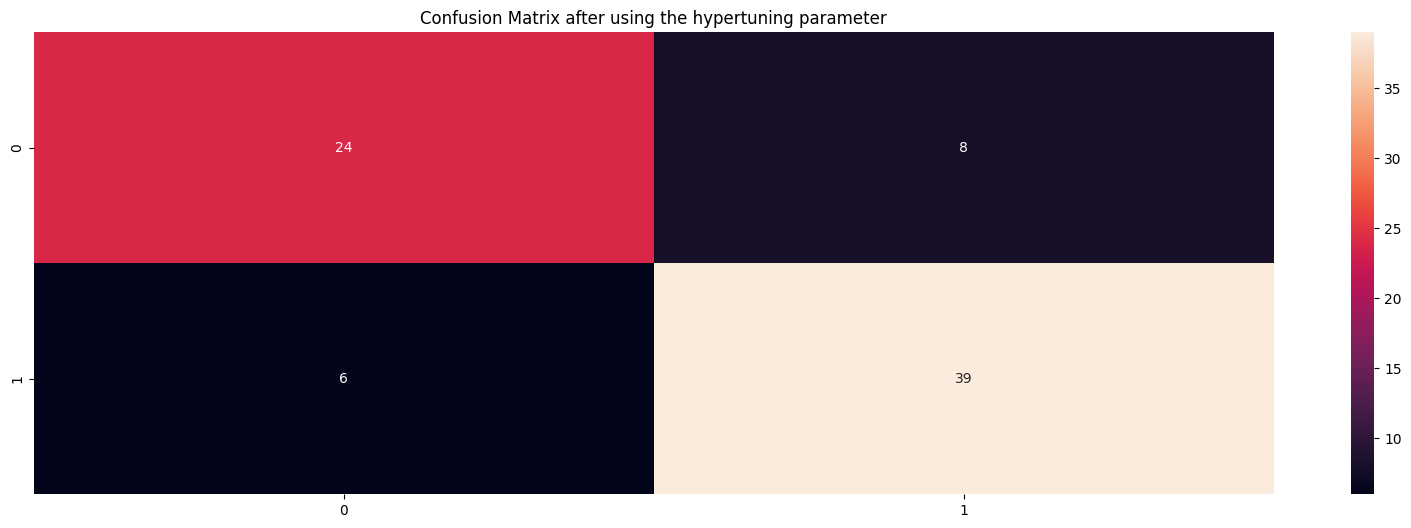

In [415]:
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Confusion Matrix after using the hypertuning parameter")
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)


### Answer 8

In [403]:
X_train_2 = X_train.loc[:,['ca','thal']]
X_test_2 = X_test.loc[:,['ca','thal']]


# traing the model
clf_2 = RandomForestClassifier()
clf_2.fit(X_train_2,y_train)

# predicting the model
y_pred_2 = clf_2.predict(X_test_2)


accuracy = accuracy_score(y_test,y_pred_2)
precision = precision_score(y_test,y_pred_2)
recall = recall_score(y_test,y_pred_2)
f1 = f1_score(y_test,y_pred_2)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1: ",f1)

Accuracy:  0.8051948051948052
Precision:  0.8260869565217391
Recall:  0.8444444444444444
F1:  0.8351648351648352


### Insights":

- Accuracy Sudden decreased

### Confusiion matrix after selecting two most important features


<Axes: title={'center': 'Confusion Matrix after selecting the 2 most importnant features'}>

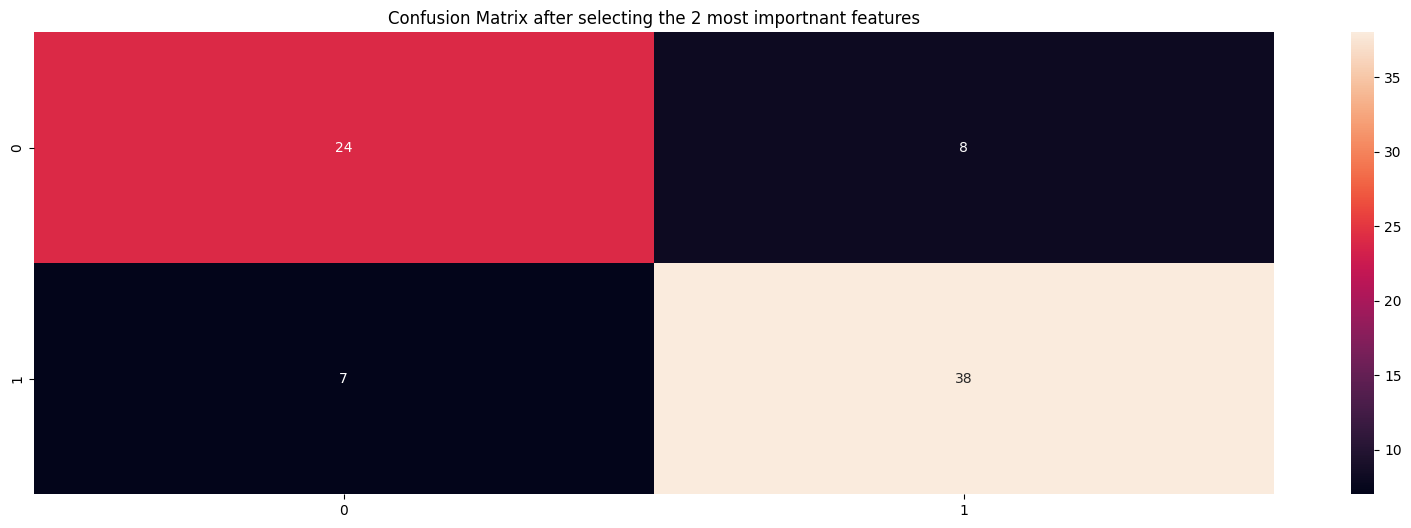

In [414]:
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Confusion Matrix after selecting the 2 most importnant features")
sns.heatmap(confusion_matrix(y_test,y_pred_2), annot = True)

## plotting the deciosn boundry 


c:\Users\Sachin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


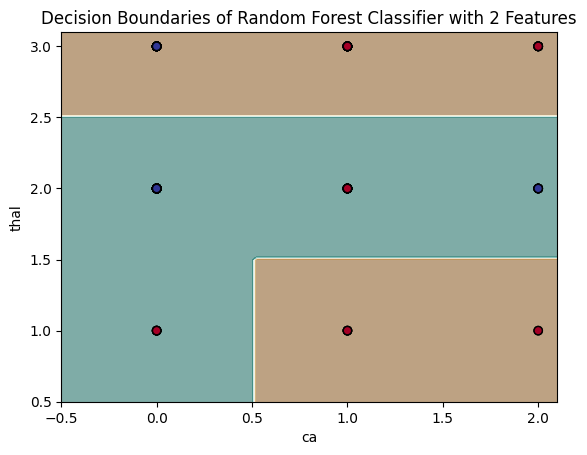

In [404]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the two features
X_two_features = X_train.loc[:, ['ca', 'thal']]

# Define the range of the plot
x_min, x_max = X_two_features.iloc[:, 0].min() - 0.5, X_two_features.iloc[:, 0].max() + 0.1
y_min, y_max = X_two_features.iloc[:, 1].min() - 0.5, X_two_features.iloc[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Make predictions on the plot
Z = clf_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.BrBG, alpha=0.5)

# Plot the data points
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')

# Add axis labels and a title
plt.xlabel('ca')
plt.ylabel('thal')
plt.title('Decision Boundaries of Random Forest Classifier with 2 Features')

# Show the plot
plt.show()


## Insights :
